In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
devil = pd.read_csv("telecom_customer_churn.csv")

In [3]:
devil

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [4]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
devil["Avg Monthly Long Distance Charges"]

0       42.39
1       10.69
2       33.65
3       27.82
4        7.38
        ...  
7038    46.68
7039    16.20
7040    18.62
7041     2.12
7042      NaN
Name: Avg Monthly Long Distance Charges, Length: 7043, dtype: float64

In [6]:
devil["Avg Monthly Long Distance Charges"].mean()

25.420517214274486

In [7]:
devil["Avg Monthly Long Distance Charges"].fillna(value=devil["Avg Monthly Long Distance Charges"].mean(),inplace=True)

In [8]:
devil["Avg Monthly Long Distance Charges"].unique()

array([42.39, 10.69, 33.65, ..., 10.04, 25.59,  2.01])

In [9]:
devil["Avg Monthly Long Distance Charges"].duplicated().unique()

array([False,  True])

In [10]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [11]:
devil["Multiple Lines"]

0        No
1       Yes
2        No
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042    NaN
Name: Multiple Lines, Length: 7043, dtype: object

In [12]:
devil.drop("Multiple Lines", axis=1, inplace=True)

In [13]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [14]:
devil["Internet Type"].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [15]:
devil["Internet Type"].mode()

0    Fiber Optic
Name: Internet Type, dtype: object

In [16]:
devil["Internet Type"].unique().shape

(4,)

In [17]:
devil["Internet Type"].fillna(value="Fiber Optic",inplace=True)

In [18]:
devil["Internet Type"].unique()

array(['Cable', 'Fiber Optic', 'DSL'], dtype=object)

In [19]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [20]:
devil["Avg Monthly GB Download"].mean()

26.189958310676094

In [21]:
devil["Avg Monthly GB Download"].mode()

0    19.0
Name: Avg Monthly GB Download, dtype: float64

In [22]:
devil["Avg Monthly GB Download"].fillna(value=devil["Avg Monthly GB Download"].mean(),inplace=True)

In [23]:
devil["Avg Monthly GB Download"].unique()

array([16.        , 10.        , 30.        ,  4.        , 11.        ,
       73.        , 14.        ,  7.        , 21.        , 59.        ,
       19.        , 12.        , 20.        , 22.        , 17.        ,
        9.        , 26.18995831, 52.        , 57.        , 51.        ,
       41.        , 23.        , 27.        ,  2.        , 69.        ,
       53.        , 15.        , 29.        , 85.        , 28.        ,
       18.        , 48.        , 25.        , 26.        ,  8.        ,
        6.        ,  5.        , 13.        , 75.        , 82.        ,
       24.        , 76.        , 47.        , 71.        , 58.        ,
       42.        ,  3.        , 56.        , 46.        , 39.        ])

In [24]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [25]:
devil["Online Security"].mode()

0    No
Name: Online Security, dtype: object

In [26]:
devil["Online Security"].fillna(value="No",inplace=True)

In [27]:
devil["Online Security"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [29]:
devil["Unlimited Data"].unique()

array(['Yes', 'No', nan], dtype=object)

In [30]:
devil["Unlimited Data"].fillna(value="Yes",inplace=True)

In [31]:
devil["Unlimited Data"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [33]:
devil["Online Backup"].mode()

0    No
Name: Online Backup, dtype: object

In [34]:
devil["Online Backup"].fillna(value="No",inplace=True)

In [35]:
devil["Online Backup"].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
devil["Device Protection Plan"].mode()

0    No
Name: Device Protection Plan, dtype: object

In [37]:
devil["Device Protection Plan"].fillna(value="No",inplace=True)

In [38]:
devil["Device Protection Plan"].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
devil["Premium Tech Support"].mode()

0    No
Name: Premium Tech Support, dtype: object

In [40]:
devil["Premium Tech Support"].fillna(value="No",inplace=True)

In [41]:
devil["Premium Tech Support"].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [43]:
devil["Streaming TV"].mode()

0    No
Name: Streaming TV, dtype: object

In [44]:
devil["Streaming TV"].fillna("No",inplace=True)

In [45]:
devil["Streaming Movies"].mode()

0    No
Name: Streaming Movies, dtype: object

In [46]:
devil["Streaming Movies"].fillna(value="No",inplace=True)

In [47]:
devil["Streaming Movies"].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
devil["Streaming Music"].mode()

0    No
Name: Streaming Music, dtype: object

In [49]:
devil["Streaming Music"].fillna(value="No",inplace=True)

In [50]:
devil["Streaming Music"].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [52]:
devil.drop("Churn Category", axis=1, inplace=True)

In [53]:
devil.drop("Churn Reason", axis=1, inplace=True)

In [54]:
devil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [55]:
devil.to_csv('Update_telecom_customer_churnm.csv', index=False)

In [56]:
devil

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [57]:
pc_grp = devil.groupby('Married')
dd = pc_grp.count()
pc_grp.count()

,Customer ID,Gender,Age,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
Married,,,,,,,,,,,,,,,,,,,,,
No,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,...,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641
Yes,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,...,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402


<Axes: ylabel='Total Charges'>

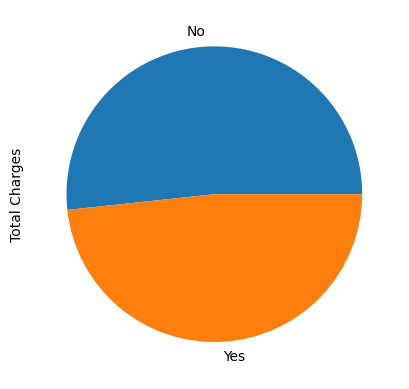

In [58]:
dd['Total Charges'].plot(kind='pie')

Total cost is less of Married people. 

In [59]:
devil.isnull()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Married'>

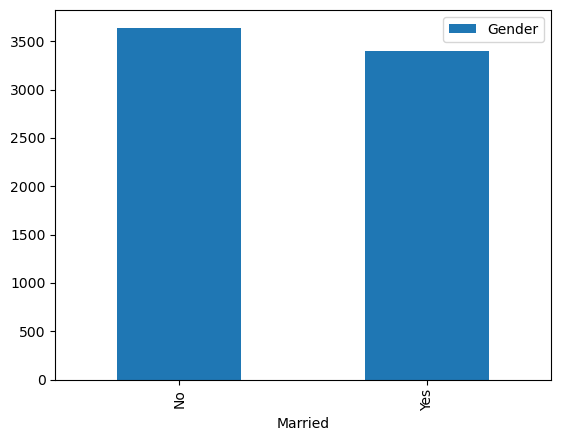

In [60]:
dd.plot(y='Gender', kind='bar')

<Axes: ylabel='City'>

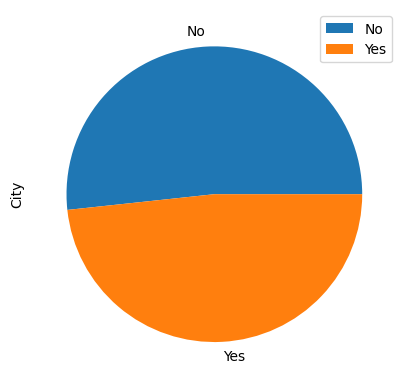

In [61]:
dd.plot(y='City', kind='pie')

<Axes: ylabel='Number of Dependents'>

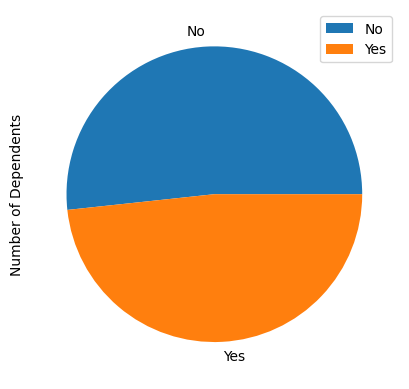

In [62]:
dd.plot(y='Number of Dependents', kind='pie')

In [63]:
sex_grp = devil.groupby('Gender')

In [64]:
m = sex_grp.describe().transpose()

In [65]:
m

Gender                     Female          Male
Age           count   3488.000000   3555.000000
              mean      46.472764     46.545992
              std       16.784498     16.719063
              min       19.000000     19.000000
              25%       32.000000     32.500000
...                           ...           ...
Total Revenue min       21.400000     21.360000
              25%      615.845000    598.925000
              50%     2064.600000   2146.090000
              75%     4813.142500   4778.715000
              max    11979.340000  11868.340000

[120 rows x 2 columns]

<Axes: ylabel='Frequency'>

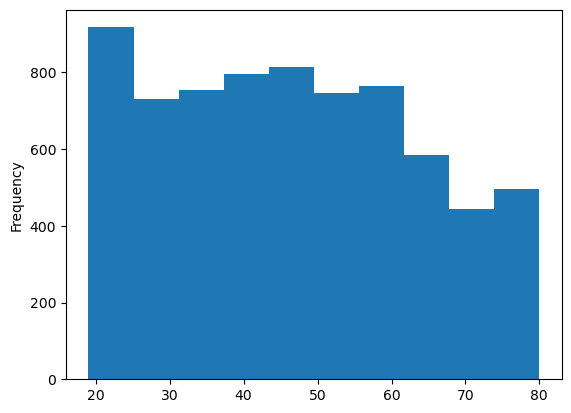

In [66]:
devil["Age"].plot(kind='hist')

In [67]:
devil

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [68]:
ll_grp = devil.groupby('Total Long Distance Charges')
ll2= ll_grp.count()
pc_grp.count()

,Customer ID,Gender,Age,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
Married,,,,,,,,,,,,,,,,,,,,,
No,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,...,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641
Yes,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,...,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402


<Axes: ylabel='Total Refunds'>

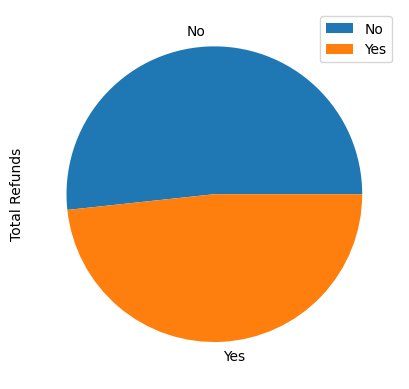

In [69]:
dd.plot(y='Total Refunds', kind='pie')

<Axes: ylabel='Frequency'>

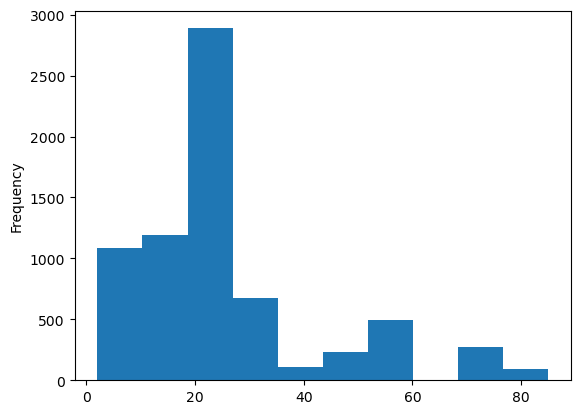

In [70]:
devil["Avg Monthly GB Download"].plot(kind='hist')

<Axes: ylabel='Avg Monthly GB Download'>

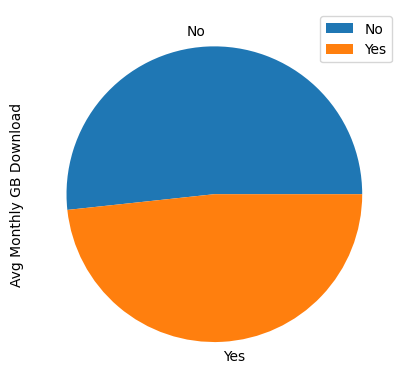

In [71]:
dd.plot(y='Avg Monthly GB Download', kind='pie')

Non married people are used internet more than married people.

<Axes: xlabel='Married'>

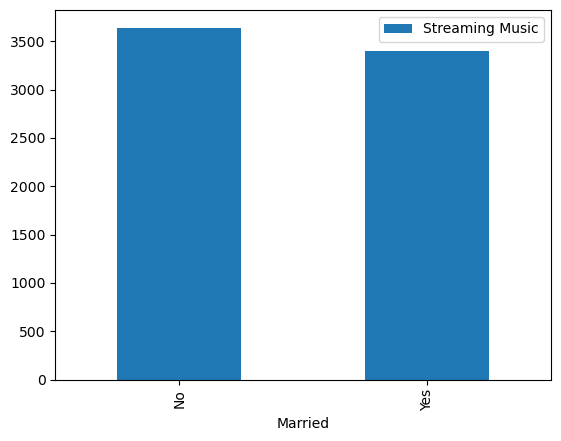

In [72]:
dd.plot(y='Streaming Music', kind='bar')

Non married people are watching movies,tv, lisent music more than married people.

<Axes: xlabel='Married'>

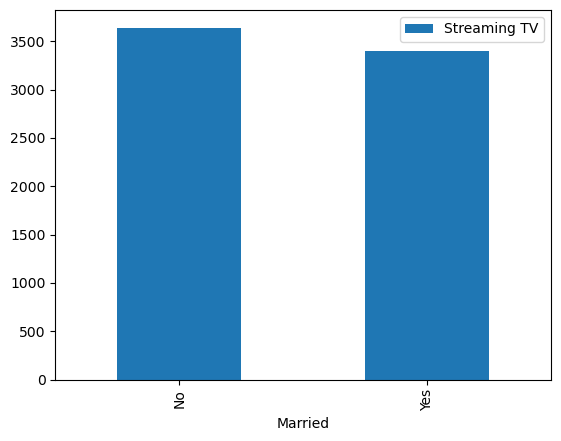

In [73]:
dd.plot(y='Streaming TV', kind='bar')

<Axes: ylabel='Streaming Movies'>

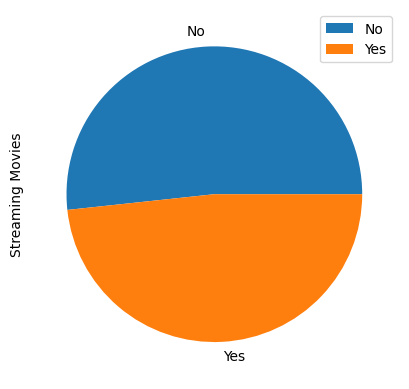

In [74]:
dd.plot(y='Streaming Movies', kind='pie')

In [75]:
devil["Contract"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Contract
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [76]:
devil["Contract"].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

<Axes: ylabel='Customer Status'>

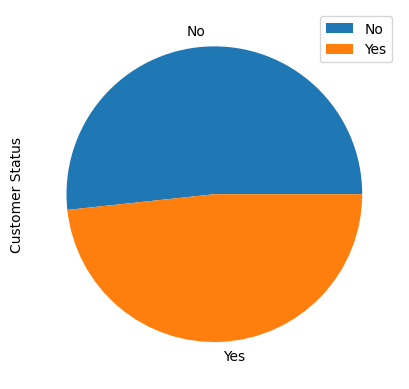

In [77]:
dd.plot(y='Customer Status', kind='pie')

<Axes: ylabel='Frequency'>

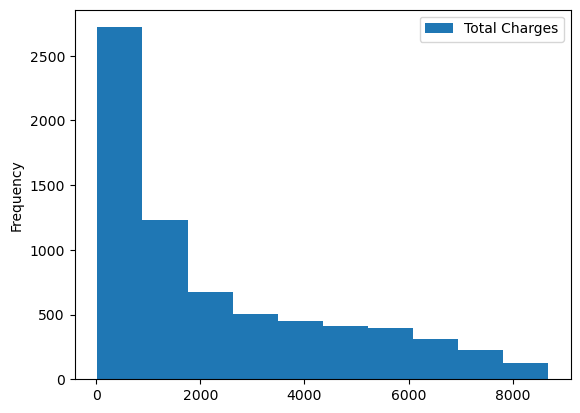

In [78]:
devil.plot(x='Total Long Distance Charges', y='Total Charges',kind='hist')

<Axes: ylabel='Phone Service'>

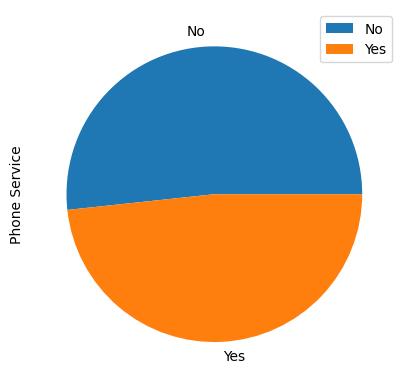

In [79]:
dd.plot(y='Phone Service', kind='pie')

<Axes: ylabel='Frequency'>

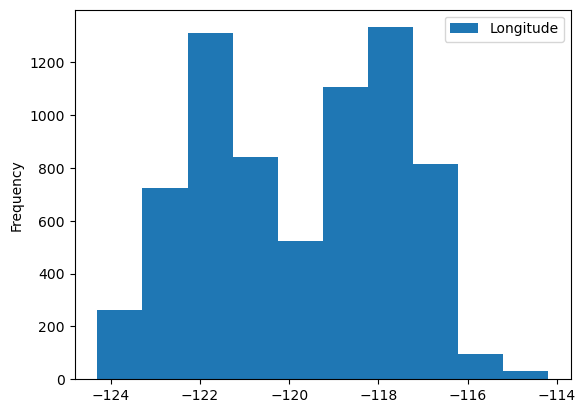

In [80]:
devil.plot(x='Latitude', y='Longitude',kind='hist')